In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Documents\15 days project datasets\Sleep_health_and_lifestyle_dataset.csv")
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [20]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [35]:
df['Sleep Disorder'].fillna('None',inplace = True)

In [150]:
df['Stress Level'].max()

8

In [149]:
df[df['Stress Level'] == 8]['Gender'].value_counts()

Gender
Male      36
Female    34
Name: count, dtype: int64

##### 36 males and 34 females reported experiencing the maximum stress level

In [151]:
df[df['Stress Level'] == 8][df['Gender'] == 'Male']['Occupation'].value_counts()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6696\59770651.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Stress Level'] == 8][df['Gender'] == 'Male']['Occupation'].value_counts()


Occupation
Doctor                  33
Sales Representative     2
Software Engineer        1
Name: count, dtype: int64

In [54]:
df[df['Stress Level'] == 8][df['Gender'] == 'Female']['Occupation'].value_counts()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6696\1775114271.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Stress Level'] == 8][df['Gender'] == 'Female']['Occupation'].value_counts()


Occupation
Nurse        32
Scientist     2
Name: count, dtype: int64

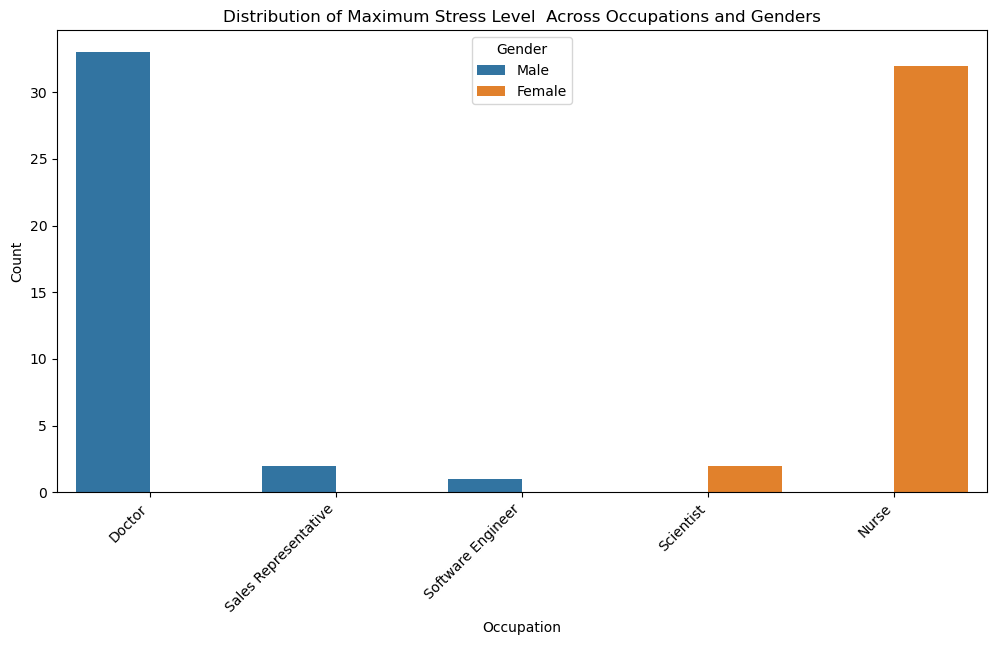

In [64]:
max_stress = df[df['Stress Level'] == 8]
plt.figure(figsize=(12, 6))
sns.countplot(max_stress, x='Occupation', hue='Gender')
plt.title('Distribution of Maximum Stress Level  Across Occupations and Genders')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()

##### This observation highlights a concentration of individuals in high stress occupations, specifically doctors for males and nurses for females, both reporting a stress level of 8

In [58]:
df['Quality of Sleep'].max()

9

In [70]:
df[df['Quality of Sleep'] == 9]['Occupation'].value_counts()

Occupation
Nurse         33
Engineer      32
Doctor         4
Accountant     2
Name: count, dtype: int64

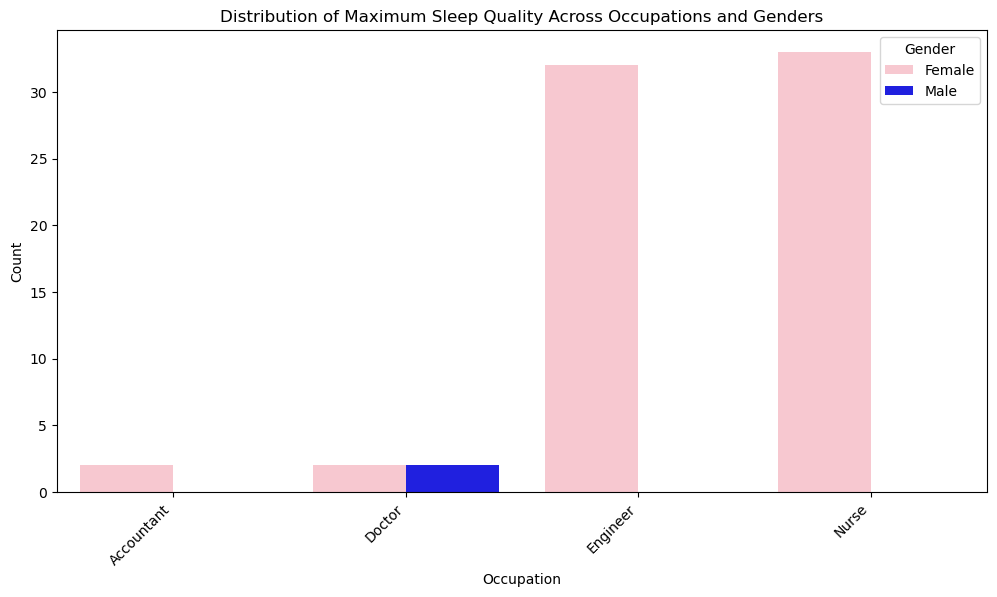

In [104]:
max_stress = df[df['Quality of Sleep'] == 9]
plt.figure(figsize=(12, 6))
sns.countplot(max_stress, x='Occupation', hue='Gender',palette = ['pink','blue'])
plt.title('Distribution of Maximum Sleep Quality Across Occupations and Genders')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

 - Engineers and nurses generally have a higher sleep quality compared to doctors and accountants.
 - The graph shows that female engineers have the highest sleep quality counts (around 30)
 - The trend suggests that certain occupations are associated with better sleep quality

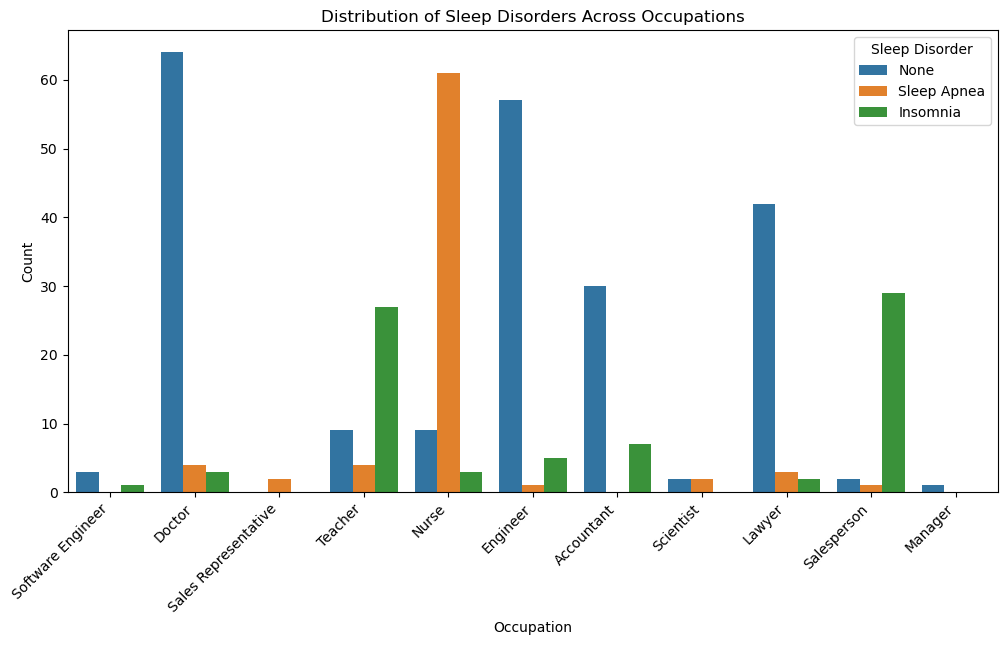

In [100]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Occupation', hue='Sleep Disorder')
plt.title('Distribution of Sleep Disorders Across Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sleep Disorder')
plt.show()

#### In analyzing the prevalence of sleep disorders across occupations, distinct patterns emerge. Around 60 of nurses report experiencing sleep apnea, indicating a notable occurrence within this profession. On the contrary, a majority of doctors, more than 60, do not report any sleep disorders. Interestingly, approximately 30 of teachers and managers disclose experiencing insomnia, highlighting a relatively higher occurrence of this sleep disorder within these occupational groups. These findings suggest diverse sleep disorder trends among different professions

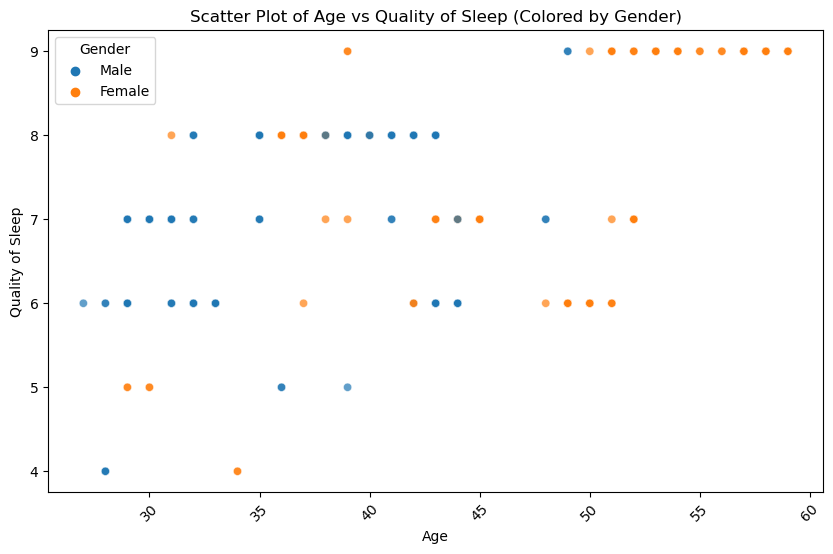

In [108]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Quality of Sleep', hue='Gender', alpha=0.7)
plt.title('Scatter Plot of Age vs Quality of Sleep (Colored by Gender)')
plt.xlabel('Age')
plt.ylabel('Quality of Sleep')
plt.xticks(rotation=45)
plt.show()

  - As age increases, the quality of sleep tends to improve for both males and females.
  - Individuals around the age of 60 generally have higher sleep quality scores.
  - Younger individuals (around 30) show more varied sleep quality results
  - Females aged between 50 and 60 consistently report the highest quality of sleep compared to other  age groups and genders
   -  This analysis suggests that age plays a role in sleep quality, with older individuals experiencing better sleep. Gender differences are also evident in the data

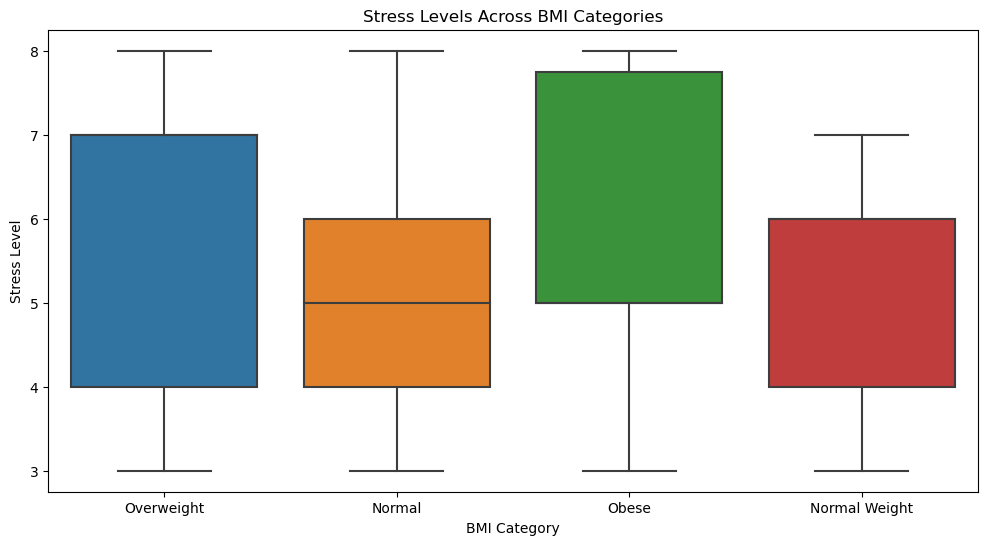

In [90]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='BMI Category', y='Stress Level')
plt.title('Stress Levels Across BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Stress Level')
plt.show()

##### When analyzing stress levels across different BMI categories, a distinct pattern emerges. Individuals classified as  Obese  tend to exhibit higher stress levels, followed by those categorized as Overweight . Normal Weight individuals  generally experience lower stress levels, while those in the Normal  display a moderate stress level

In [138]:
df.groupby('Gender')['BMI Category'].value_counts()

Gender  BMI Category 
Female  Overweight       106
        Normal            64
        Normal Weight     14
        Obese              1
Male    Normal           131
        Overweight        42
        Obese              9
        Normal Weight      7
Name: count, dtype: int64

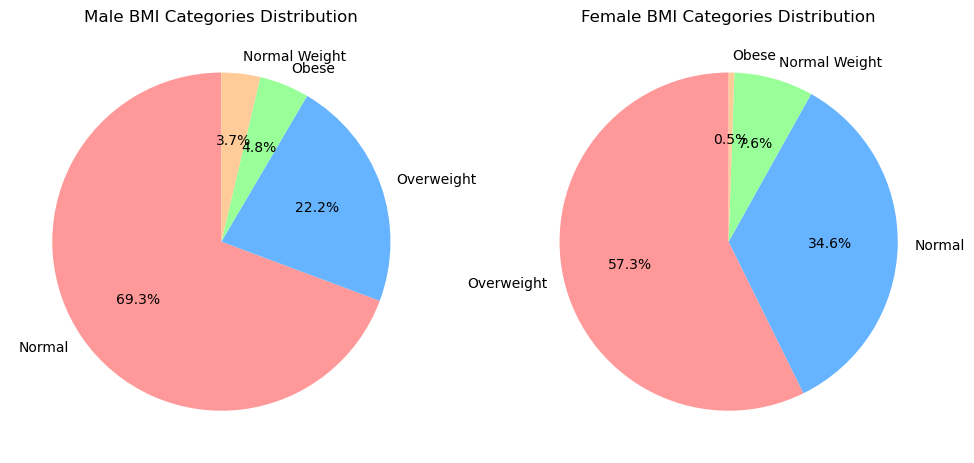

In [162]:
male_data = df[df['Gender'] == 'Male']['BMI Category'].value_counts()
female_data = df[df['Gender'] == 'Female']['BMI Category'].value_counts()
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.pie(male_data, labels=male_data.index, autopct='%1.1f%%', colors=custom_colors, startangle=90)
plt.title('Male BMI Categories Distribution')

plt.subplot(1, 2, 2)
plt.pie(female_data, labels=female_data.index, autopct='%1.1f%%', colors=custom_colors, startangle=90)
plt.title('Female BMI Categories Distribution')

plt.show()

##### When exploring the distribution of BMI categories based on gender, interesting patterns emerge. Among females, Overweight is the most prevalent category, with 106 cases(57.3%), followed by Normal with 64 cases(34.6%). Normal Weight is less common, with 14 cases(7.6%), and Obese has the lowest occurrence, with only 1 case(0.5%). In contrast, among males, Normal is the dominant category, with 131 cases(69.3%), followed by Overweight with 42 cases(22.2%). Obese and Normal Weight have lower prevalence, with 9 and 7 cases, respectively. These findings shed light on the gender-specific distribution of BMI categories, highlighting potential variations in health and lifestyle patterns between males and females

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6696\1412581616.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='Stress Level', y='Quality of Sleep', palette='viridis')


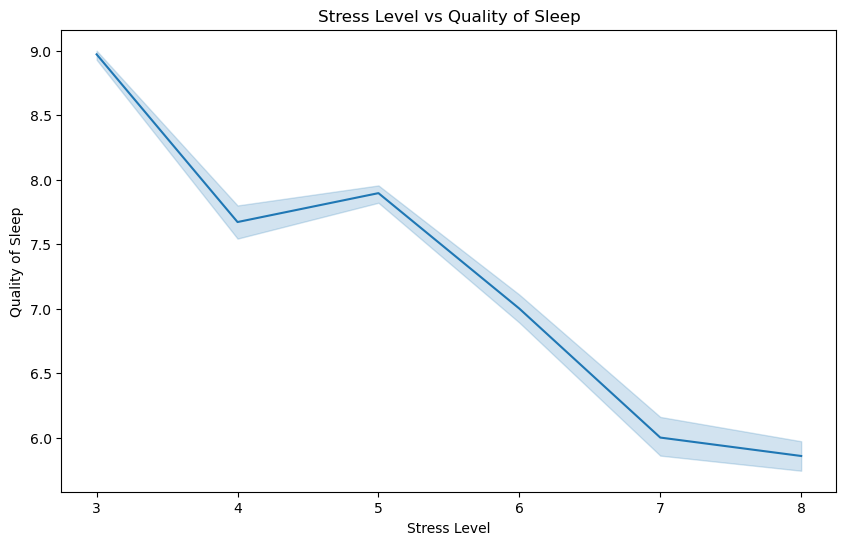

In [165]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Stress Level', y='Quality of Sleep', palette='viridis')
plt.title('Stress Level vs Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

##### In the dataset, there appears to be an inverse relationship between stress level and the quality of sleep. As stress levels increase, there is a tendency for the quality of sleep to decrease. This observation suggests a potential correlation between higher stress levels and poorer sleep quality among the individuals in the study